# Prediction of Employee Attrition/Burnout
Authors: Florencia Luque and Simon Schmetz

__What to hand in__
- A jupyter notebook with the code in the proposed order of steps. Please use some of the cells
to comment about what you are doing and your results. In particular, emphasise your 2
conclusions after each step with short arguments based on your results. If it is more convenient,
you can also hand in a file with Python code instead and a separate report.
If you decide to use any AI chatbot, briefly explain in those commented cells what purpose you
used it for and how you used it (for instance, you can quote the prompt and the output used,
in case they are short. Otherwise, you can give a brief summary).
Please write the names of the components of your group at the beginning of the notebook.
- A file containing your final trained model in an appropriate ML format (joblib).
- A .csv file containing your final model's predictions (values of your model's predictions in the
competition set).

# 1. EDA

Do a simplified EDA, mainly to determine how many features and instances there are, which variables
are categorical/numerical, if there are categorical variables with high cardinality, which features have
missing values and how many, whether there are constant columns or ID columns, and whether it is
a regression or classification problem. If the latter, is it imbalanced? You can explore other issues in
the data you find useful.

In [828]:
import pandas as pd
import numpy as np
import sklearn as skn
import matplotlib.pyplot as plt
import seaborn as sns


In [829]:
data_train = pd.read_csv("attrition_availabledata_10.csv.gz", compression='gzip')
data_test = pd.read_csv("attrition_competition_10.csv.gz", compression='gzip')


In [830]:
data_train.head()

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,7.462297,13.0,3.0,3.0,3.0,3.0,3.0,48.0,Travel_Rarely,Research & Development,...,Y,13.0,8.0,1.0,18.0,2.0,8.0,7.0,7.0,No
1,7.488597,6.0,1.0,3.0,3.0,4.0,4.0,31.0,Travel_Frequently,Research & Development,...,Y,17.0,8.0,1.0,3.0,2.0,1.0,0.0,0.0,Yes
2,7.116541,16.0,2.0,4.0,1.0,1.0,3.0,36.0,Travel_Rarely,Research & Development,...,Y,24.0,8.0,0.0,6.0,6.0,5.0,0.0,3.0,No
3,9.709125,6.0,3.0,4.0,3.0,3.0,3.0,49.0,Travel_Rarely,Research & Development,...,Y,22.0,8.0,0.0,25.0,2.0,7.0,0.0,7.0,No
4,6.297729,6.0,4.0,3.0,3.0,2.0,3.0,40.0,Travel_Frequently,Research & Development,...,Y,13.0,8.0,1.0,8.0,3.0,8.0,3.0,7.0,No


In [831]:
data_train.shape

(2940, 31)

We have 2940 instances and 31 variables including the attrition. 

In [832]:
data_train.isna().sum()/data_train.shape[0] 

hrs                        0.0
absences                   0.0
JobInvolvement             0.0
PerformanceRating          0.0
EnvironmentSatisfaction    0.0
JobSatisfaction            0.0
WorkLifeBalance            0.0
Age                        0.0
BusinessTravel             0.0
Department                 0.0
DistanceFromHome           0.0
Education                  0.0
EducationField             0.0
EmployeeCount              0.0
EmployeeID                 0.0
Gender                     0.0
JobLevel                   0.0
JobRole                    0.0
MaritalStatus              0.0
MonthlyIncome              0.0
NumCompaniesWorked         0.0
Over18                     0.0
PercentSalaryHike          0.0
StandardHours              0.0
StockOptionLevel           0.0
TotalWorkingYears          0.0
TrainingTimesLastYear      0.0
YearsAtCompany             0.0
YearsSinceLastPromotion    0.0
YearsWithCurrManager       0.0
Attrition                  0.0
dtype: float64

There's no Nan values in any of the columns in the available data

In [833]:
data_train.dtypes

hrs                        float64
absences                   float64
JobInvolvement             float64
PerformanceRating          float64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
Age                        float64
BusinessTravel              object
Department                  object
DistanceFromHome           float64
Education                  float64
EducationField              object
EmployeeCount              float64
EmployeeID                 float64
Gender                      object
JobLevel                   float64
JobRole                     object
MaritalStatus               object
MonthlyIncome              float64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike          float64
StandardHours              float64
StockOptionLevel           float64
TotalWorkingYears          float64
TrainingTimesLastYear      float64
YearsAtCompany             float64
YearsSinceLastPromot

In [834]:
data_train.columns

Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'Over18', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition'],
      dtype='object')

The data is unbalanced with a 83.8% of No and 16.12% of Yes in the response variable

In [835]:
data_train.groupby("Attrition").count()/data_train.shape[0]

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
No,0.838776,0.838776,0.838776,0.838776,0.838776,0.838776,0.838776,0.838776,0.838776,0.838776,...,0.838776,0.838776,0.838776,0.838776,0.838776,0.838776,0.838776,0.838776,0.838776,0.838776
Yes,0.161224,0.161224,0.161224,0.161224,0.161224,0.161224,0.161224,0.161224,0.161224,0.161224,...,0.161224,0.161224,0.161224,0.161224,0.161224,0.161224,0.161224,0.161224,0.161224,0.161224


In [836]:
### Define Columns
categorical_variables = ['JobInvolvement', 'PerformanceRating','EnvironmentSatisfaction', 'JobSatisfaction',
                          'WorkLifeBalance','BusinessTravel', 'Department', 'Education','EducationField',
                           'JobLevel','JobRole','MaritalStatus','StockOptionLevel']

binary_variables = ['Gender','Attrition']

numeric_variables = ['hrs','absences','Age','DistanceFromHome','MonthlyIncome','NumCompaniesWorked',
                     'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

drop_variables = ["EmployeeCount",'Over18','StandardHours',"EmployeeID"]

In [837]:
data_train.dtypes


hrs                        float64
absences                   float64
JobInvolvement             float64
PerformanceRating          float64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
Age                        float64
BusinessTravel              object
Department                  object
DistanceFromHome           float64
Education                  float64
EducationField              object
EmployeeCount              float64
EmployeeID                 float64
Gender                      object
JobLevel                   float64
JobRole                     object
MaritalStatus               object
MonthlyIncome              float64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike          float64
StandardHours              float64
StockOptionLevel           float64
TotalWorkingYears          float64
TrainingTimesLastYear      float64
YearsAtCompany             float64
YearsSinceLastPromot

In [838]:
data_train.head(10)

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,7.462297,13.0,3.0,3.0,3.0,3.0,3.0,48.0,Travel_Rarely,Research & Development,...,Y,13.0,8.0,1.0,18.0,2.0,8.0,7.0,7.0,No
1,7.488597,6.0,1.0,3.0,3.0,4.0,4.0,31.0,Travel_Frequently,Research & Development,...,Y,17.0,8.0,1.0,3.0,2.0,1.0,0.0,0.0,Yes
2,7.116541,16.0,2.0,4.0,1.0,1.0,3.0,36.0,Travel_Rarely,Research & Development,...,Y,24.0,8.0,0.0,6.0,6.0,5.0,0.0,3.0,No
3,9.709125,6.0,3.0,4.0,3.0,3.0,3.0,49.0,Travel_Rarely,Research & Development,...,Y,22.0,8.0,0.0,25.0,2.0,7.0,0.0,7.0,No
4,6.297729,6.0,4.0,3.0,3.0,2.0,3.0,40.0,Travel_Frequently,Research & Development,...,Y,13.0,8.0,1.0,8.0,3.0,8.0,3.0,7.0,No
5,5.742623,13.0,2.0,3.0,4.0,3.0,3.0,52.0,Travel_Rarely,Research & Development,...,Y,11.0,8.0,1.0,9.0,1.0,5.0,1.0,4.0,No
6,5.792075,21.0,2.0,3.0,3.0,4.0,2.0,27.0,Travel_Rarely,Sales,...,Y,13.0,8.0,1.0,6.0,2.0,6.0,1.0,4.0,No
7,6.792231,14.0,2.0,3.0,3.0,1.0,2.0,49.0,Travel_Rarely,Research & Development,...,Y,11.0,8.0,1.0,16.0,3.0,15.0,5.0,11.0,No
8,5.601004,17.0,2.0,3.0,4.0,3.0,3.0,47.0,Travel_Rarely,Research & Development,...,Y,19.0,8.0,3.0,27.0,3.0,5.0,1.0,0.0,No
9,6.918927,7.0,2.0,3.0,4.0,1.0,3.0,29.0,Travel_Rarely,Research & Development,...,Y,12.0,8.0,0.0,11.0,4.0,3.0,1.0,2.0,No


In [839]:
data_train.shape

(2940, 31)

In [840]:
#data_train[categorical_variables+constant_variables].nunique()

The cardinality of the variable JobRole is high, since there are 9 distinct levels. Variable EmployeeID is also high in cardinality, but since this is an ID column, it needs to be one to one with the number of observations in the dataset, which it is.

There are three constant columns: StandardHours, Over18, and EmployeeCount. The first one indicates that all employees work 8 hours. The second confirms that only people over 18 years old are hired. The third serves as a check to make sure the count of employees is correct.


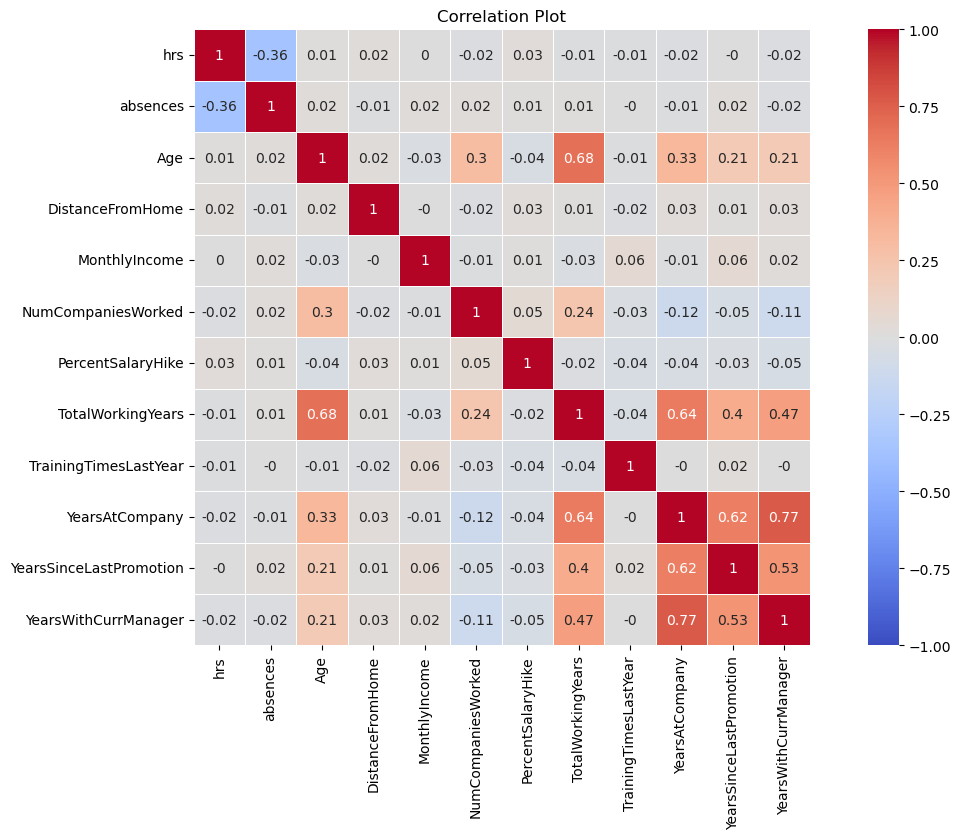

In [841]:
corr_mat = np.round_(data_train[numeric_variables].corr(),decimals=2)
plt.figure(figsize=(15, 8))  # Adjust the figure size as needed
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True, linewidths=0.5)
plt.title('Correlation Plot')
plt.show()

There's a few high correlations.\
Age with totalworkingyears is 0.68.\
YearsatCompany and YearsWithCurrManager is 0.77.\
YearsAtCompamy TotalWorkingYears is 0.64.\
YearsSinceLastPromotion and YearsAtCompany is 0.62.

In [842]:
data_train[numeric_variables].describe()

,hrs,absences,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,7.343023,12.626871,36.868707,9.146599,65335.258503,2.635374,15.166667,11.264626,2.787075,7.075170,2.231973,4.155442
std,1.344743,5.473052,9.053869,8.051168,47379.053635,2.480624,3.641110,7.762161,1.286027,6.205245,3.241121,3.615304
min,5.416880,1.000000,18.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.285664,8.000000,30.000000,2.000000,29040.000000,1.000000,12.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,7.048879,13.000000,36.000000,7.000000,49385.000000,2.000000,14.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,8.008627,17.000000,43.000000,14.000000,83920.000000,4.000000,18.000000,15.000000,3.000000,10.000000,3.000000,7.000000
max,10.937261,24.000000,60.000000,29.000000,199990.000000,9.000000,25.000000,40.000000,6.000000,40.000000,15.000000,17.000000



The variable that we want to explain is binary, Yes or No, indicating that this is a classification problme.

## 2. Set Up (train/test split)

1. Split your data into train and test.
2. Decide on how the inner evaluation is going to be carried out. The inner evaluation is used when
doing hyper-parameter optimization/tuning, but it is also used to evaluate and compare different
alternatives. This means that if for example, you decide to use 3-fold crossvalidation for the inner
evaluation, all alternatives that you try should be evauated with 3-fold crossvalidation, in order
to be compared.

In [843]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [844]:
# Load dataset
X, y = data_train.drop(columns=["Attrition"]), data_train.Attrition
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=42)

# set up splits
inner = KFold(n_splits=4, shuffle=True, random_state=42)
inner_scores = {}

# 3. Evaluate Models w Cross Validation on train Data

1. Train, evaluate and compare the two basic methods with default hyperparameters, and also a
dummy method. For KNN, you should use a pipeline with preprocessing included (scaling, at
least). You should compare 2 scaling methods for KNN and determine which one works better in
this problem.
2. Do hyperparameter tuning for the two basic methods, using GridSearch and/or Random Search.
Does HPO improve results over default hyper-parameter values? At what computational cost?
Which HPO technique obtains the best results?

In [845]:
# # Regression Tree with default parameters
# tree_reg = DecisionTreeRegressor(random_state=42)
# tree_default_scores = cross_val_score(tree_reg, X_train, y_train, cv=inner, scoring='neg_root_mean_squared_error')
# inner_scores['Tree Default'] = -tree_default_scores.mean()


# # Regression Tree with hyperparameter tuning via gridsearch
# param_grid_tree = {'max_depth': [10, 20, 30],
#                    'min_samples_split': [2, 10, 20]}
# grid_search_tree = GridSearchCV(tree_reg, param_grid_tree, cv=inner, scoring='neg_root_mean_squared_error')
# grid_search_tree.fit(X_train, y_train)
# inner_scores['Tree Tuned'] = -grid_search_tree.best_score_

In [846]:
### Define Columns
categorical_variables = ['JobInvolvement', 'PerformanceRating','EnvironmentSatisfaction', 'JobSatisfaction',
                          'WorkLifeBalance','BusinessTravel', 'Department', 'Education','EducationField',
                           'JobLevel','JobRole','MaritalStatus','StockOptionLevel']

binary_variables = ['Gender','Attrition']

numeric_variables = ['hrs','absences','Age','DistanceFromHome','MonthlyIncome','NumCompaniesWorked',
                     'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

drop_variables = ["EmployeeCount",'Over18','StandardHours',"EmployeeID"]

In [847]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KNeighborsClassifier

### Set up Pipeline

# drop columns step
class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Ensure X is a DataFrame before calling drop()
        if isinstance(X, pd.DataFrame):
            return X.drop(columns=self.columns, errors='ignore')
        else:
            return X  # If X is not a DataFrame, return as-is (or handle differently)

# encode categorical
categorical_transformer = OrdinalEncoder(categories="auto")

# encode binary
binary_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing into a column transformer
X_binary_variables = [var for var in binary_variables if var != 'Attrition']
preprocessor = Pipeline(steps=[
    ('drop_columns', DropColumns(columns=drop_variables)),  # Drop specified columns
    ('column_transformer', ColumnTransformer([
        ('ord', categorical_transformer, categorical_variables),
        ('non_ord', binary_transformer, X_binary_variables)
    ]))
])

#pipelines for kmeans and/or dummy model this include the scaling of the numerical data 
standar_scaling = StandardScaler()
minmax_scaling = MinMaxScaler()

preprocessor_scaling_standard = Pipeline(steps=[
    ('drop_columns', DropColumns(columns=drop_variables)), 
    ('column_transformer', ColumnTransformer([
        ('ord', categorical_transformer, categorical_variables),
        ('non_ord', binary_transformer, X_binary_variables),
        ('num',standar_scaling,numeric_variables)
    ]))
])

preprocessor_scaling_minmax= Pipeline(steps=[
    ('drop_columns', DropColumns(columns=drop_variables)), 
    ('column_transformer', ColumnTransformer([
        ('ord', categorical_transformer, categorical_variables),
        ('non_ord', binary_transformer, X_binary_variables),
        ('num',minmax_scaling,numeric_variables)
    ]))
])


In [848]:

### Train/Test Split
X, y = data_train.drop(columns=["Attrition"]), data_train.Attrition
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=42)

### Encode y 
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


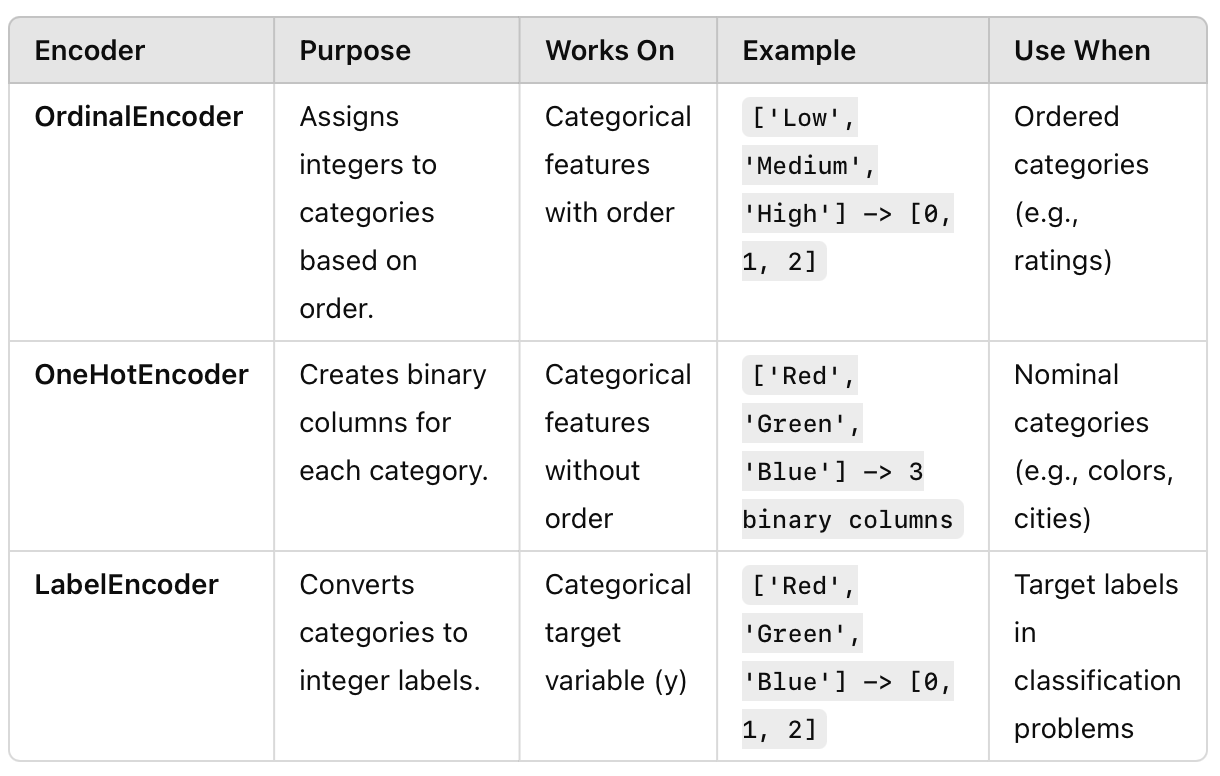

In [849]:
# CROSS VALIDATION

### Cross Validation WHITHOUT hyperparameter tuning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import time
from memory_profiler import memory_usage
def CV_full_auto(pipeline, inner,param_grid):
    #neg_mean_squared_error (this is typically use for regression) change for ROC-AUC is for classification and better for unbalanced dataset
    cv_scores = cross_val_score(pipeline, X_train, y_train_encoded, cv=inner, scoring='roc_auc') 
    print("\n##### Default Hyperparameters #####")
    print(f"Cross-validated scores: {cv_scores}")
    print(f"Mean: {cv_scores.mean():.3f}")
    print(f"Standard deviation: {cv_scores.std():.3f}")

    """
    ideas for scoring
        'roc_auc': 'roc_auc',
        'f1': 'f1',
        'precision': 'precision',
        'recall': 'recall',
        'accuracy': 'accuracy'
    }
    """
    ### Perform cross-validation WITH hyperparameter tuning - GRID SEARCH
    start_time = time.time()
    # Set up GridSearchCV
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid = param_grid,
        scoring = 'roc_auc',
        #scoring='neg_mean_squared_error',  # Metric to optimize
        cv=inner,  # Cross-validation splits
        n_jobs=-1,  # Use all available cores
        verbose=1  # Print progress
    )
    

    # Fit the grid search
    memory_start = memory_usage(-1, interval=0.1, timeout=None)
    grid_search.fit(X_train, y_train_encoded)
    memory_end = memory_usage(-1, interval=0.1, timeout=None)
    end_time = time.time()
    # Print the best parameters and best RMSE
    print("\n##### Optimized Hyperparameters: Grid Search #####")
    print("Best parameters found:", grid_search.best_params_)
    print(f"Best cross-validated ROC: {grid_search.best_score_:.3f}")  # Negated because RMSE is a loss #change to ROC for clasification
    print (f"It took {end_time-start_time:.3f} seconds")
    print(f"Memory used: {max(memory_end) - min(memory_start):.3f} MB")
    start_time = time.time()
    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_grid,
        scoring='roc_auc',
        #scoring='neg_mean_squared_error',
        cv=inner,
        n_iter=20,
        n_jobs=-1,
        verbose=1,
        random_state=42
    )
    memory_start = memory_usage(-1, interval=0.1, timeout=None)
    random_search.fit(X_train, y_train_encoded)
    end_time = time.time()
    dif = end_time-start_time
    memory_end = memory_usage(-1, interval=0.1, timeout=None)
    print("\n##### Optimized Hyperparameters: Random Search #####")
    print("Best parameters found :", random_search.best_params_)
    print(f"Best cross-validated ROC: {random_search.best_score_:.3f}")
    print(f"it took {dif:.3f} seconds")
    print(f"Memory used: {max(memory_end) - min(memory_start):.3f} MB")



### Dummy test 
The dummy model is use to create a baseline to compare to the different models that we are going to create.

In [850]:
#libraries
from sklearn.dummy import DummyClassifier
# Define the full pipeline with scaling applied to numerical features
dummy_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Preprocess all features
    ('scaler', StandardScaler()),  # Scale all features after preprocessing
    ('dummy', DummyClassifier(random_state=42))  # Apply dummy Classifier
])
# set up splits
inner = KFold(n_splits=4, shuffle=True, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'dummy__strategy': ['most_frequent', 'stratified', 'uniform', 'constant'],  # Strategies to evaluate
    'dummy__constant': [0, 1]  # Only relevant if strategy='constant'
}

CV_full_auto(pipeline = dummy_pipeline, 
             inner=inner,
             param_grid=param_grid)


##### Default Hyperparameters #####
Cross-validated scores: [0.5 0.5 0.5 0.5]
Mean: 0.500
Standard deviation: 0.000
Fitting 4 folds for each of 8 candidates, totalling 32 fits

##### Optimized Hyperparameters: Grid Search #####
Best parameters found: {'dummy__constant': 0, 'dummy__strategy': 'stratified'}
Best cross-validated ROC: 0.513
It took 0.328 seconds
Memory used: 0.441 MB
Fitting 4 folds for each of 8 candidates, totalling 32 fits


c:\Users\flore\anaconda3\envs\pyomo_env\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



##### Optimized Hyperparameters: Random Search #####
Best parameters found : {'dummy__strategy': 'stratified', 'dummy__constant': 0}
Best cross-validated ROC: 0.513
it took 0.230 seconds
Memory used: 0.000 MB


In [851]:

# Define the full pipeline with scaling applied to numerical features
dummy_pipeline = Pipeline([
    ('preprocessor', preprocessor_scaling_minmax),  # Preprocess all features
    ('dummy', DummyClassifier(random_state=42))  # Apply dummy Classifier
])
# set up splits
inner = KFold(n_splits=4, shuffle=True, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'dummy__strategy': ['most_frequent', 'stratified', 'uniform', 'constant'],  # Strategies to evaluate
    'dummy__constant': [0, 1]  # Only relevant if strategy='constant'
}

CV_full_auto(pipeline = dummy_pipeline, 
             inner=inner,
             param_grid=param_grid)


##### Default Hyperparameters #####
Cross-validated scores: [0.5 0.5 0.5 0.5]
Mean: 0.500
Standard deviation: 0.000
Fitting 4 folds for each of 8 candidates, totalling 32 fits

##### Optimized Hyperparameters: Grid Search #####
Best parameters found: {'dummy__constant': 0, 'dummy__strategy': 'stratified'}
Best cross-validated ROC: 0.513
It took 0.350 seconds
Memory used: 0.000 MB
Fitting 4 folds for each of 8 candidates, totalling 32 fits


c:\Users\flore\anaconda3\envs\pyomo_env\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



##### Optimized Hyperparameters: Random Search #####
Best parameters found : {'dummy__strategy': 'stratified', 'dummy__constant': 0}
Best cross-validated ROC: 0.513
it took 0.231 seconds
Memory used: 0.000 MB


In [852]:

# Define the full pipeline with scaling applied to numerical features
dummy_pipeline = Pipeline([
    ('preprocessor', preprocessor_scaling_standard),  # Preprocess all features
    ('dummy', DummyClassifier(random_state=42))  # Apply dummy Classifier
])
# set up splits
inner = KFold(n_splits=4, shuffle=True, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'dummy__strategy': ['most_frequent', 'stratified', 'uniform', 'constant'],  # Strategies to evaluate
    'dummy__constant': [0, 1]  # Only relevant if strategy='constant'
}

CV_full_auto(pipeline = dummy_pipeline, 
             inner=inner,
             param_grid=param_grid)


##### Default Hyperparameters #####
Cross-validated scores: [0.5 0.5 0.5 0.5]
Mean: 0.500
Standard deviation: 0.000
Fitting 4 folds for each of 8 candidates, totalling 32 fits

##### Optimized Hyperparameters: Grid Search #####
Best parameters found: {'dummy__constant': 0, 'dummy__strategy': 'stratified'}
Best cross-validated ROC: 0.513
It took 0.332 seconds
Memory used: 0.000 MB
Fitting 4 folds for each of 8 candidates, totalling 32 fits


c:\Users\flore\anaconda3\envs\pyomo_env\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



##### Optimized Hyperparameters: Random Search #####
Best parameters found : {'dummy__strategy': 'stratified', 'dummy__constant': 0}
Best cross-validated ROC: 0.513
it took 0.259 seconds
Memory used: 0.000 MB


## Kmeans 

In [853]:
############ EXCECUTE

# Define the full pipeline with scaling applied to numerical features
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor_scaling_minmax),  # Preprocess all features
    ('knn', KNeighborsClassifier())  # Apply KNN
])


# set up splits
inner = KFold(n_splits=4, shuffle=True, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'knn__n_neighbors': list(range(2,11)),  # Number of neighbors
    'knn__weights': ['uniform', 'distance'],  # Weight function
    'knn__metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metric
}

CV_full_auto(pipeline = knn_pipeline, 
             inner=inner,
             param_grid=param_grid)


##### Default Hyperparameters #####
Cross-validated scores: [0.68740731 0.77296861 0.74804772 0.77696389]
Mean: 0.746
Standard deviation: 0.036
Fitting 4 folds for each of 54 candidates, totalling 216 fits

##### Optimized Hyperparameters: Grid Search #####
Best parameters found: {'knn__metric': 'manhattan', 'knn__n_neighbors': 10, 'knn__weights': 'distance'}
Best cross-validated ROC: 0.885
It took 0.888 seconds
Memory used: -1.504 MB
Fitting 4 folds for each of 20 candidates, totalling 80 fits

##### Optimized Hyperparameters: Random Search #####
Best parameters found : {'knn__weights': 'distance', 'knn__n_neighbors': 9, 'knn__metric': 'manhattan'}
Best cross-validated ROC: 0.875
it took 0.401 seconds
Memory used: 0.000 MB


In [854]:
############ EXCECUTE

# Define the full pipeline with scaling applied to numerical features
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor_scaling_standard),  # Preprocess all features
    ('knn', KNeighborsClassifier())  # Apply KNN
])


# set up splits
inner = KFold(n_splits=4, shuffle=True, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'knn__n_neighbors': list(range(2,11)),  # Number of neighbors
    'knn__weights': ['uniform', 'distance'],  # Weight function
    'knn__metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metric
}

CV_full_auto(pipeline = knn_pipeline, 
             inner=inner,
             param_grid=param_grid)


##### Default Hyperparameters #####
Cross-validated scores: [0.72415254 0.77894737 0.81920945 0.82202892]
Mean: 0.786
Standard deviation: 0.040
Fitting 4 folds for each of 54 candidates, totalling 216 fits

##### Optimized Hyperparameters: Grid Search #####
Best parameters found: {'knn__metric': 'manhattan', 'knn__n_neighbors': 10, 'knn__weights': 'distance'}
Best cross-validated ROC: 0.902
It took 0.900 seconds
Memory used: -0.613 MB
Fitting 4 folds for each of 20 candidates, totalling 80 fits

##### Optimized Hyperparameters: Random Search #####
Best parameters found : {'knn__weights': 'distance', 'knn__n_neighbors': 9, 'knn__metric': 'manhattan'}
Best cross-validated ROC: 0.901
it took 0.405 seconds
Memory used: 0.000 MB


## Trees

In [855]:
### Trees

from sklearn.tree import DecisionTreeClassifier


# Define the full pipeline with scaling applied to all features
tree_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Preprocess all features
    ('tree', DecisionTreeClassifier(random_state=42))  # Apply KNN
])


# set up splits
inner = KFold(n_splits=4, shuffle=True, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'tree__criterion': ['gini', 'entropy'],  # Splitting criteria
    'tree__max_depth': list(range(1,20)),  # Maximum depth of the tree
    'tree__min_samples_split': list(range(2,11)),  # Minimum samples required to split a node
    'tree__min_samples_leaf': [1, 2, 4],  # Minimum samples required at a leaf node
    'tree__max_features': [None, 'sqrt', 'log2'],  # Number of features to consider when splitting
}


CV_full_auto(pipeline = tree_pipeline, 
             inner=inner,
             param_grid=param_grid)




##### Default Hyperparameters #####
Cross-validated scores: [0.74841102 0.84078947 0.8060858  0.82091374]
Mean: 0.804
Standard deviation: 0.034
Fitting 4 folds for each of 3078 candidates, totalling 12312 fits

##### Optimized Hyperparameters: Grid Search #####
Best parameters found: {'tree__criterion': 'entropy', 'tree__max_depth': 19, 'tree__max_features': 'sqrt', 'tree__min_samples_leaf': 1, 'tree__min_samples_split': 3}
Best cross-validated ROC: 0.821
It took 28.217 seconds
Memory used: -3.074 MB
Fitting 4 folds for each of 20 candidates, totalling 80 fits

##### Optimized Hyperparameters: Random Search #####
Best parameters found : {'tree__min_samples_split': 2, 'tree__min_samples_leaf': 1, 'tree__max_features': None, 'tree__max_depth': 16, 'tree__criterion': 'gini'}
Best cross-validated ROC: 0.806
it took 0.370 seconds
Memory used: 0.000 MB


In [856]:
### CV INDIVIDUALLY 

# ### Cross Validation WHITHOUT hyperparameter tuning
# from sklearn.model_selection import cross_val_score

# # set up splits
# inner_scores = {}


# inner = KFold(n_splits=4, shuffle=True, random_state=42)
# cv_scores = cross_val_score(knn_pipeline, X_train, y_train_encoded, cv=inner, scoring='neg_mean_squared_error')

# print(f"Cross-validated scores: {-cv_scores}")
# print(f"Mean: {-cv_scores.mean():.3f}")
# print(f"Standard deviation: {cv_scores.std():.3f}")

# #### Perform cross-validation WITH hyperparameter tuning - GRID SEARCH
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid for hyperparameter tuning
# param_grid = {
#     'knn__n_neighbors': [3, 5, 7, 9],  # Number of neighbors
#     'knn__weights': ['uniform', 'distance'],  # Weight function
#     'knn__metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metric
# }

# # Set up GridSearchCV
# grid_search = GridSearchCV(
#     estimator=knn_pipeline,
#     param_grid=param_grid,
#     scoring='neg_mean_squared_error',  # Metric to optimize
#     cv=inner,  # Cross-validation splits
#     n_jobs=-1,  # Use all available cores
#     verbose=1  # Print progress
# )

# # Fit the grid search
# grid_search.fit(X_train, y_train_encoded)

# # Print the best parameters and best RMSE
# print("Best parameters found:", grid_search.best_params_)
# print(f"Best cross-validated RMSE: {-grid_search.best_score_:.3f}")  # Negated because RMSE is a loss



# from sklearn.model_selection import RandomizedSearchCV

# random_search = RandomizedSearchCV(
#     estimator=knn_pipeline,
#     param_distributions=param_grid,
#     scoring='neg_mean_squared_error',
#     cv=inner,
#     n_iter=20,
#     n_jobs=-1,
#     verbose=1,
#     random_state=42
# )

# random_search.fit(X_train, y_train_encoded)

# print("Best parameters found (RandomizedSearchCV):", random_search.best_params_)
# print(f"Best cross-validated RMSE (RandomizedSearchCV): {-random_search.best_score_:.3f}")





In [857]:
############################################### Concepts
# Define columns by type
numerical_features = ['age', 'income', 'years_experience']
ordinal_features = ['education_level']
non_ordinal_features = ['city', 'gender']

# Define transformations for each type
numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean'))  # Impute missing numerical features
])

ordinal_transformer = OrdinalEncoder(categories=[['High School', 'Bachelor\'s', 'Master\'s', 'PhD']])

non_ordinal_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing into a column transformer
preprocessor = ColumnTransformer([
    ('num', numerical_transformer, numerical_features),  # Impute numerical features
    ('ord', ordinal_transformer, ordinal_features),  # Encode ordinal categorical features
    ('non_ord', non_ordinal_transformer, non_ordinal_features)  # One-hot encode non-ordinal categorical features
])

def train(optimize=False):
    results = []
    model = [KNeighborsRegressor(), model2 , model3]
    # Define the full pipeline with scaling applied to all features
    for model in models:
        pipeline = Pipeline([
            ('preprocessor', preprocessor),  # Preprocess all features
            ('scaler', StandardScaler()),  # Scale all features after preprocessing
            ('model', model)  # Apply KNN
        ])
        pipeline.fit()
        predictions = pipeline.predict()

        if optimize: 
            grid_search_tree = GridSearchCV(pipeline, param_grid_tree, cv=inner, scoring='neg_root_mean_squared_error')
            grid_search_tree.fit(X_train, y_train)
            inner_scores['Tree Tuned'] = -grid_search_tree.best_score_

        score = score(predictions)
        results.append(score)




pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Preprocess all features
    ('scaler', StandardScaler()),  # Scale all features after preprocessing
    ('model', grid_search_tree)  # Apply KNN
])

param_grid_tree = {'model__max_depth': [10, 20, 30],
                   'model__min_samples_split': [2, 10, 20]}

grid_search_tree = GridSearchCV(pipeline, param_grid_tree, cv=inner, scoring='neg_root_mean_squared_error')


pipeline.fit(X_train, y_train)
inner_scores['Tree Tuned'] = -grid_search_tree.best_score_


NameError: name 'grid_search_tree' is not defined

# 5. Results and Final Model (Optional)

- Report your results: report the inner evaluation of all alternatives tested and select the best one
according to the inner evaluation.
- Evaluate the best alternative on the test set in order to estimate what the performance of your
model could be at the competition (outer evaluation == estimation of future performance).
- Using the best method, train the final model and use it to make predictions on the competition
dataset. Save both the final model in an appropriate ML format and the competition predictions
in a a csv file.

In [ ]:
# # Fit the pipeline
# knn_pipeline.fit(X_train, y_train_encoded)

# # Make predictions
# predictions = knn_pipeline.predict(X_test)

# # Print results
# print("Predictions:", predictions)


# 4. Feture Selection for KNN
- Using now the optimal number of neighbors found when doing HPO, use grid-search for
selecting the optimal number of features (using SelectKBest). Is the number of features
selected much smaller than the original number? Which are the most important
features? 

# Open-Choice Task
- Decide on your own some additional task, either because it could improve results or because
you find it particularly interesting to explore. Justify your selection.

__Ideas__
- try other models (ensemble models): 
    - Random Forest 
    - Boosting -> (Gradient Boosting/Hist Boosting, XGBoost, LIGHTGBM, CATBoost(can handel with categorical variables without enconding))

###############################################################################################

# Stuff from Class

In [27]:
# Regression Tree with default parameters
tree_reg = DecisionTreeRegressor(random_state=42)
tree_default_scores = cross_val_score(tree_reg, X_train, y_train, cv=inner, scoring='neg_root_mean_squared_error')
inner_scores['Tree Default'] = -tree_default_scores.mean()

# Regression Tree with hyperparameter tuning
param_grid_tree = {'max_depth': [10, 20, 30],
                   'min_samples_split': [2, 10, 20]}
grid_search_tree = GridSearchCV(tree_reg, param_grid_tree, cv=inner, scoring='neg_root_mean_squared_error')
grid_search_tree.fit(X_train, y_train)
inner_scores['Tree Tuned'] = -grid_search_tree.best_score_

In [28]:
#KNN with StandardScaler using Pipeline:

knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

knn_std_default_scores = cross_val_score(knn_pipeline, X_train, y_train, cv=inner, scoring='neg_root_mean_squared_error')
inner_scores['KNN Standard Default'] = -knn_std_default_scores.mean()

# KNN with HPO:
pipe_param_grid = {
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance']
}

grid_search_knn = GridSearchCV(knn_pipeline, pipe_param_grid, cv=inner, scoring='neg_root_mean_squared_error')
grid_search_knn.fit(X_train, y_train)
inner_scores['KNN Standard Tuned'] = -grid_search_knn.best_score_

In [29]:
#Trees with default hyper-parameters:

tree_reg = DecisionTreeRegressor(random_state=42)

empty_param_grid_tree = {}

grid_search_tree_default = GridSearchCV(tree_reg, empty_param_grid_tree, cv=inner, scoring='neg_root_mean_squared_error')

grid_search_tree_default.fit(X_train, y_train)

inner_scores['Tree Default'] = -grid_search_tree_default.best_score_

#Trees with HPO:

param_grid_tree = {'max_depth': [10, 20, 30],
                   'min_samples_split': [2, 10, 20]}

grid_search_tree = GridSearchCV(tree_reg, param_grid_tree, cv=inner, scoring='neg_root_mean_squared_error')

grid_search_tree.fit(X_train, y_train)

inner_scores['Tree Tuned'] = -grid_search_tree.best_score_

In [30]:
# Dummy Regressor using mean
dummy_reg = DummyRegressor(strategy='mean')
dummy_scores = cross_val_score(dummy_reg, X_train, y_train, cv=inner, scoring='neg_root_mean_squared_error')
inner_scores['Dummy Mean'] = -dummy_scores.mean()

NameError: name 'DummyRegressor' is not defined

In [ ]:
# Print inner evaluation scores and ratios
print(f"{'Model': <21} {'Inner RMSE': <15} {'Model/Dummy RMSE Ratio': <20}")

for model, score in inner_scores.items():
    ratio = score / inner_scores['Dummy Mean']
    print(f"{model: <21} {score: <15.4f} {ratio: <20.4f}")

In [ ]:
# Outer evaluation for best model (estimation of future performance):
test_predictions = grid_search_knn.predict(X_test)
test_rmse = root_mean_squared_error(y_test, test_predictions)
print(f'\nBest Model: KNN Standard Tuned')
print(f'Best Model Test RMSE: {test_rmse:.4f}')

# Outer evaluation for Dummy Regressor:

dummy_reg.fit(X_train, y_train)
dummy_predictions = dummy_reg.predict(X_test)
dummy_outer_rmse = root_mean_squared_error(y_test, dummy_predictions)
print(f'\nDummy Outer RMSE: {dummy_outer_rmse:.4f}')

In [ ]:
# Train final model

final_model = grid_search_knn.fit(X,y)

In [ ]:
# Imputation + Scaling for KNN and SVM

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor

# Define steps in the pipeline
knn = KNeighborsRegressor()
scaler = StandardScaler()
imputer = SimpleImputer(strategy='mean')  # Imputation transformer for completing missing values with the mean

# Update the pipeline to include the imputation step
classif = Pipeline([
    ('imputation', imputer),
    ('standardization', scaler),
    ('knn', knn)
])

# Now you can fit the pipeline to your data and make predictions
classif.fit(X_train, y_train)
y_hat = classif.predict(X_test)


In [ ]:
### Pipeline for preprocessing data with categorical ordinal, categorical non-ordinal, and numerical features

# Define columns by type
numerical_features = ['age', 'income', 'years_experience']
ordinal_features = ['education_level']
non_ordinal_features = ['city', 'gender']

# Define transformations for each type
numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean'))  # Impute missing
])

ordinal_transformer = OrdinalEncoder(categories=[['High School', 'Bachelor\'s', 'Master\'s', 'PhD']])

non_ordinal_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing into a column transformer
preprocessor = ColumnTransformer([
    ('num', numerical_transformer, numerical_features),  # Impute numerical features
    ('ord', ordinal_transformer, ordinal_features),  # Encode ordinal categorical features
    ('non_ord', non_ordinal_transformer, non_ordinal_features)  # One-hot encode non-ordinal categorical features
])

# Define the full pipeline with scaling applied to all features
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Preprocess all features
    ('scaler', StandardScaler()),  # Scale all features after preprocessing
    ('knn', KNeighborsRegressor())  # Apply KNN
])